# Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales. The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# Hypothesis Generation: 

Based on our understanding of the problem, we can generate the following hypotheses about the factors that could affect sales:

1.Location: Sales may vary depending on the location of the store, such as in urban or rural areas or in different regions.

2.Store Size: Stores with larger size may have more products and thus higher sales.

3.Product Visibility: Products placed at strategic locations within a store, such as near the entrance or checkout, may have higher sales.

4.Product Type: Certain product categories, such as electronics or groceries, may have higher sales than others.

5.Price: Products with lower prices may have higher sales.

6.Promotions: Products with special promotions or discounts may have higher sales.

7.Brand: Certain brands may have higher sales due to customer loyalty or brand recognition.

In [1]:
#loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data path
df_train=pd.read_csv("D:\local disk E\Train.csv")
df_test=pd.read_csv("D:\local disk E\Test.csv")

In [3]:
#Exploratory data analysis
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print(f'Training Dataset (row, col): {df_train.shape}\n\nTesting Dataset (row, col): {df_test.shape}')

Training Dataset (row, col): (8523, 12)

Testing Dataset (row, col): (5681, 11)


In [6]:
df_train['source'] = 'df_train'
df_test['source'] = 'df_test'
data = pd.concat([df_train, df_test], ignore_index=True)
print('After Combining Datasets: ', data.shape)

After Combining Datasets:  (14204, 13)


In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [9]:
data.shape

(14204, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [11]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
#checking missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [13]:
data['Item_Weight'].describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [14]:
#Handling missing values
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [15]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [16]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [17]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [18]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [19]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [20]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [21]:
data['Item_Fat_Content']= data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [22]:
#Feature Engineering
data['Item_Type_Combined'] = data.Item_Identifier.apply(lambda x:x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].replace(['FD','DR','NC'],['Food','Drinks', 'Non-Consumable']) 
data.Item_Type_Combined.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [23]:
print(data)

      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1              

In [24]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Item_Type_Combined'],
      dtype='object')

In [25]:
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [26]:
#Numeric
num_df = data.select_dtypes('number')
num_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


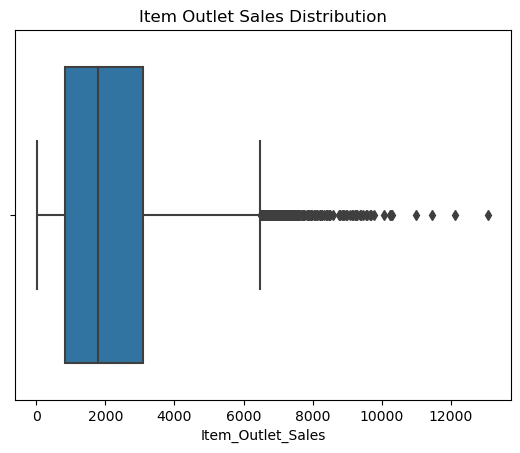

In [27]:
#Checking Outliers
sns.boxplot(x=data['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution')
plt.show()

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


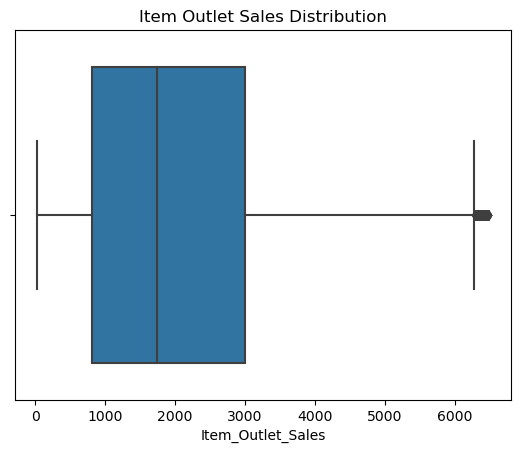

In [28]:
# Removing Outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
data = data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]
sns.boxplot(x=data['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution')
plt.show()

In [29]:
data['Item_Outlet_Sales'].isnull().sum()

0

In [30]:
#Adding a new column
data['Oultet_Age'] = 2013 - data['Outlet_Establishment_Year']

In [31]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Item_Type_Combined',
       'Oultet_Age'],
      dtype='object')

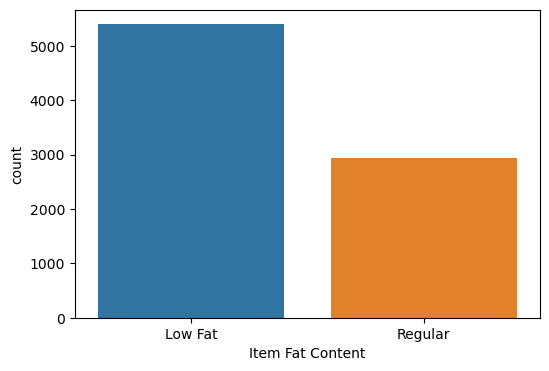

In [32]:
#Univariate analysis
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Fat_Content')
plt.xlabel('Item Fat Content')
plt.show()

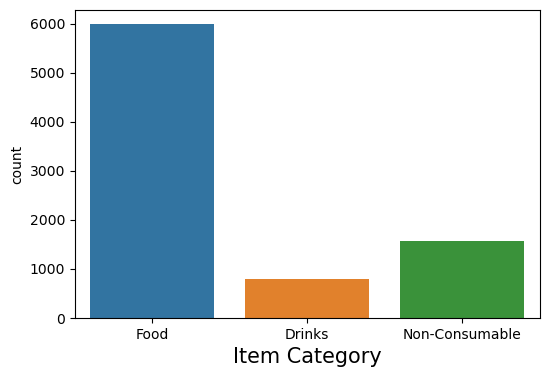

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Type_Combined')
plt.xlabel('Item Category', fontsize=15)
plt.show()

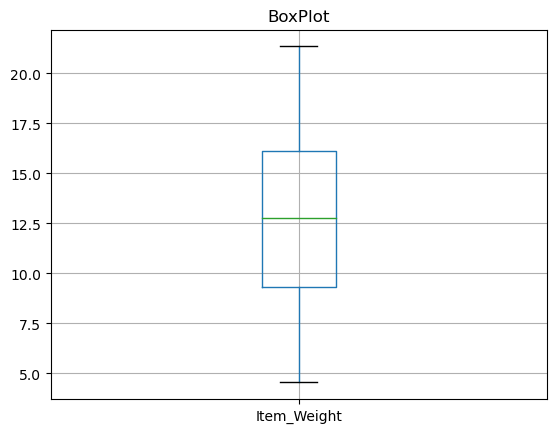

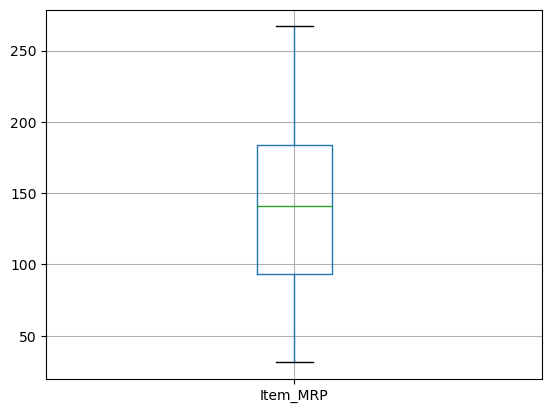

In [34]:
plt.title("BoxPlot")
data.boxplot(column=['Item_Weight'])
plt.show()
data.boxplot(column=['Item_MRP'])
plt.show()

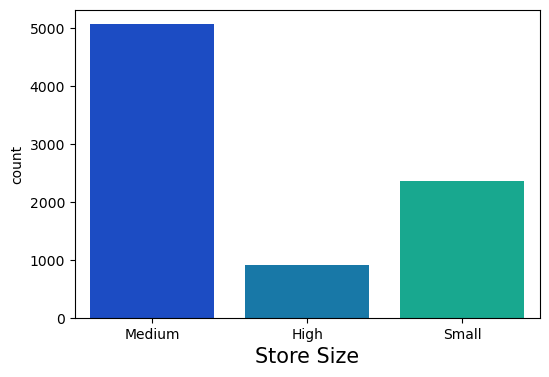

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Size',palette='winter')
plt.xlabel('Store Size', fontsize=15)
plt.show()

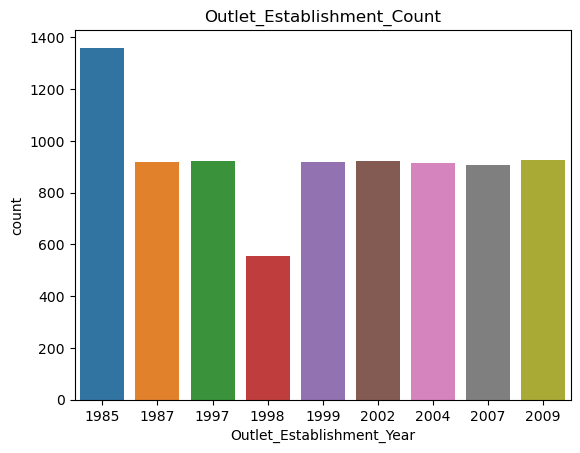

In [36]:
sns.countplot(x=data['Outlet_Establishment_Year'])
plt.title("Outlet_Establishment_Count")
plt.show()

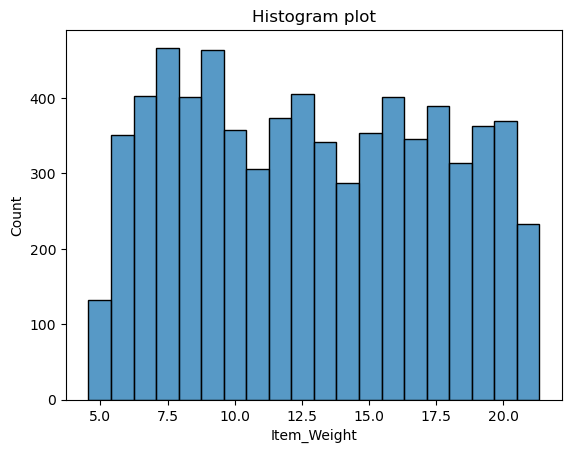

In [37]:
sns.histplot(df_train['Item_Weight'].dropna())
plt.title("Histogram plot")
plt.show()

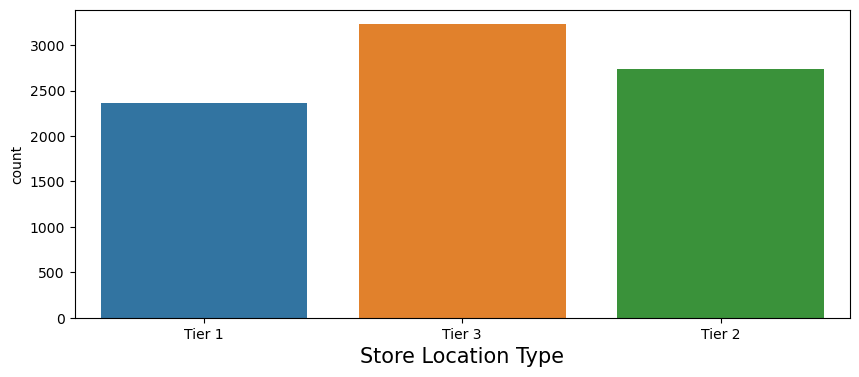

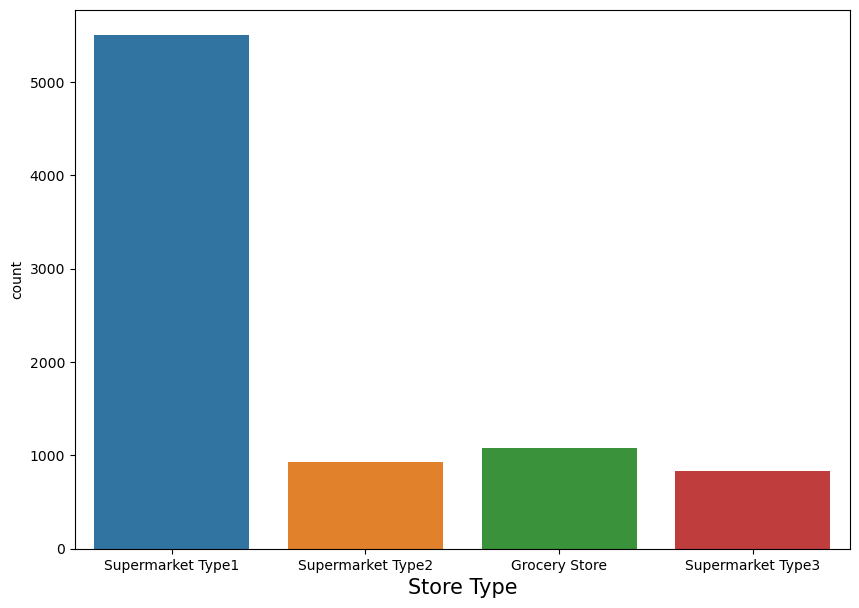

In [38]:
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='Outlet_Location_Type')
plt.xlabel('Store Location Type', fontsize=15)
plt.show()
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='Outlet_Type')
plt.xlabel('Store Type', fontsize=15)
plt.show()

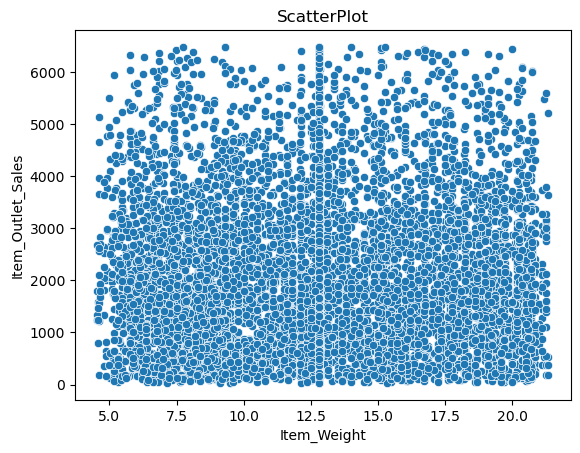

In [39]:
#Bivariate analysis
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=data)
plt.title("ScatterPlot")
plt.show()

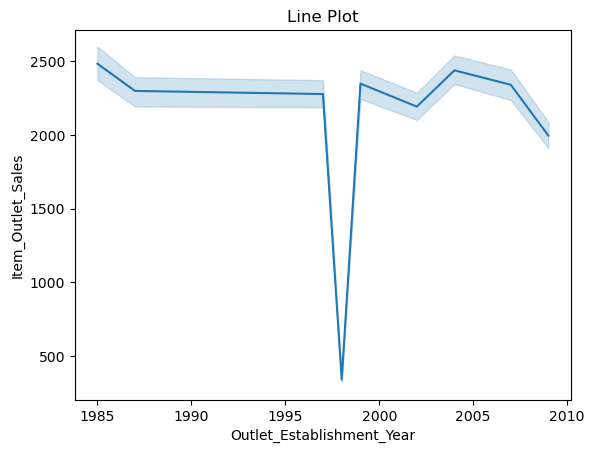

In [40]:
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df_train)
plt.title("Line Plot")
plt.show()

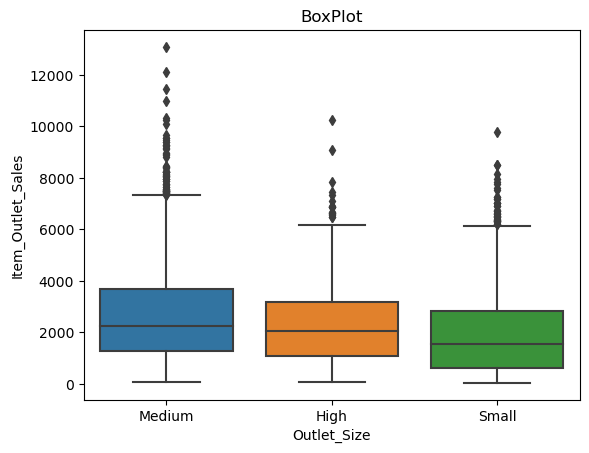

In [41]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df_train)
plt.title("BoxPlot")
plt.show()

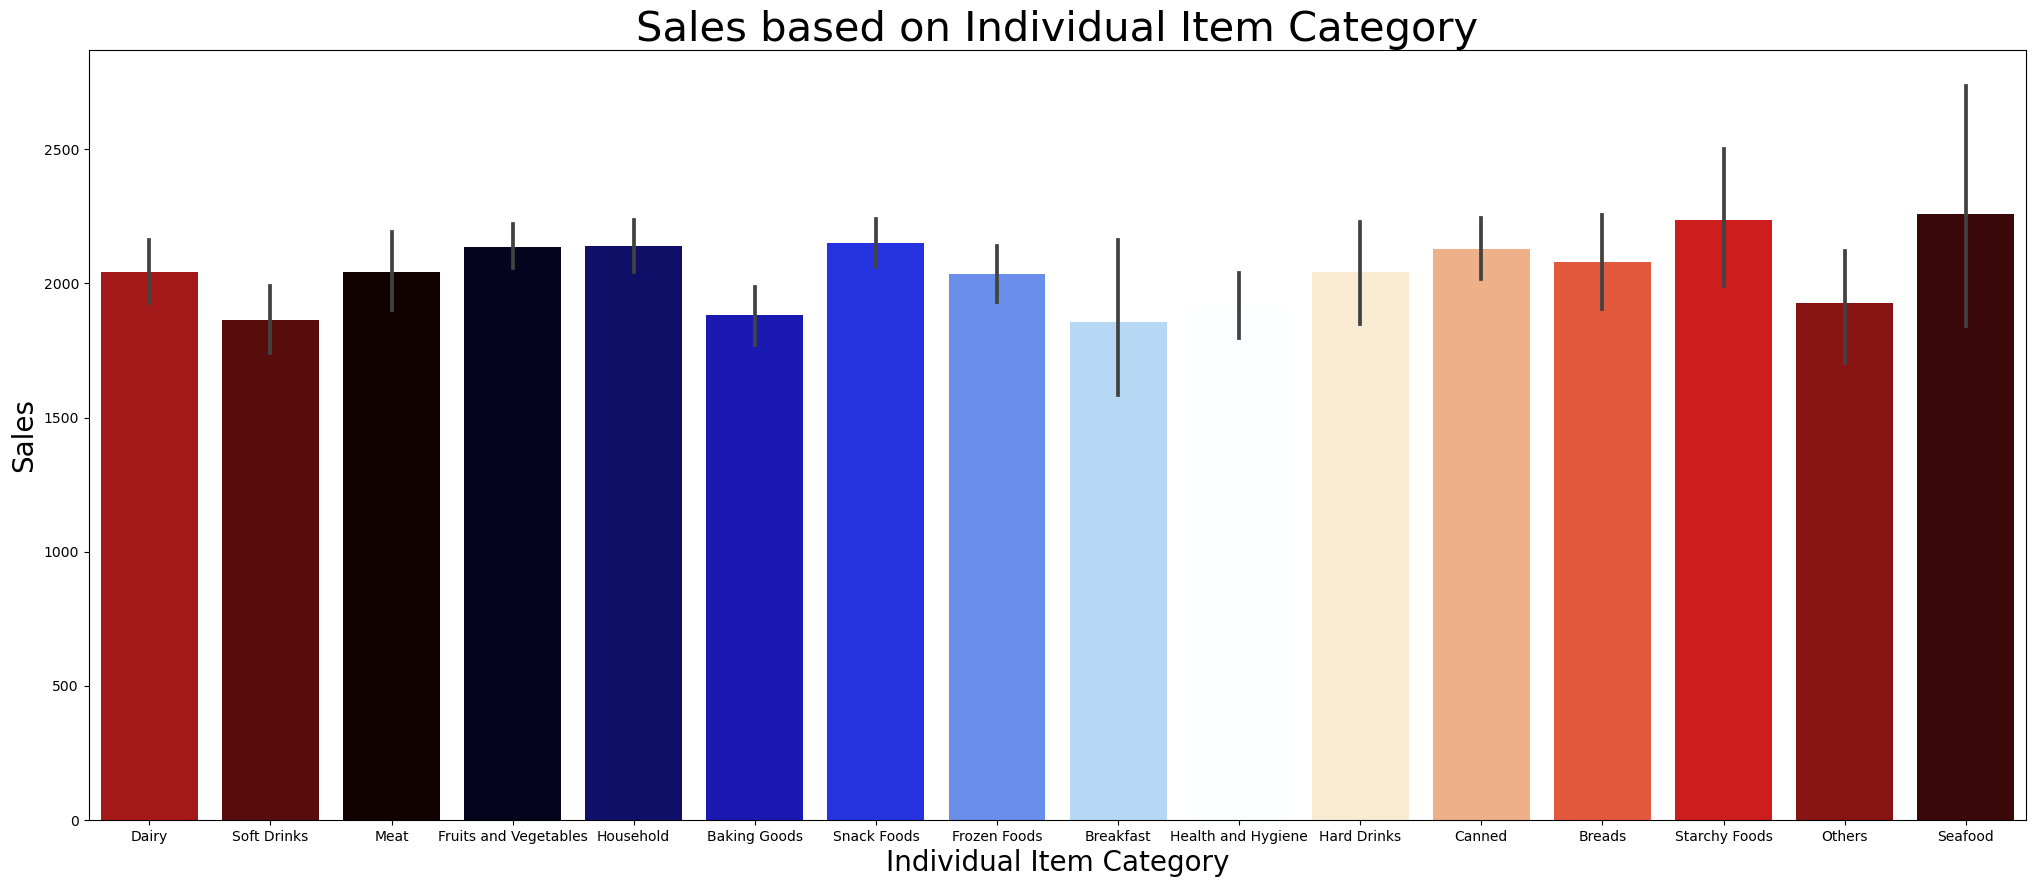

In [42]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(25,10))
sns.barplot(data=data,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.show()

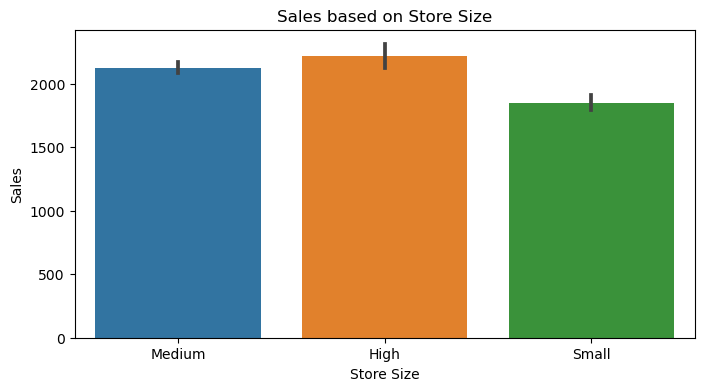

In [43]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=data,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.show()

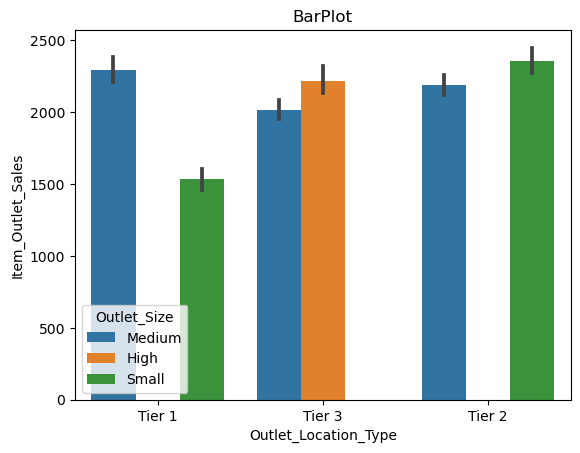

In [44]:
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=data)
plt.title("BarPlot")
plt.show()

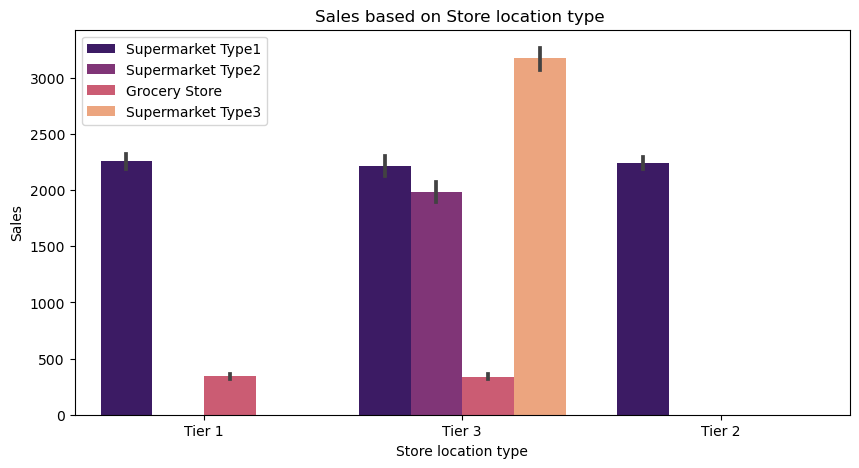

In [45]:
#Multivariate analysis
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',palette='magma')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

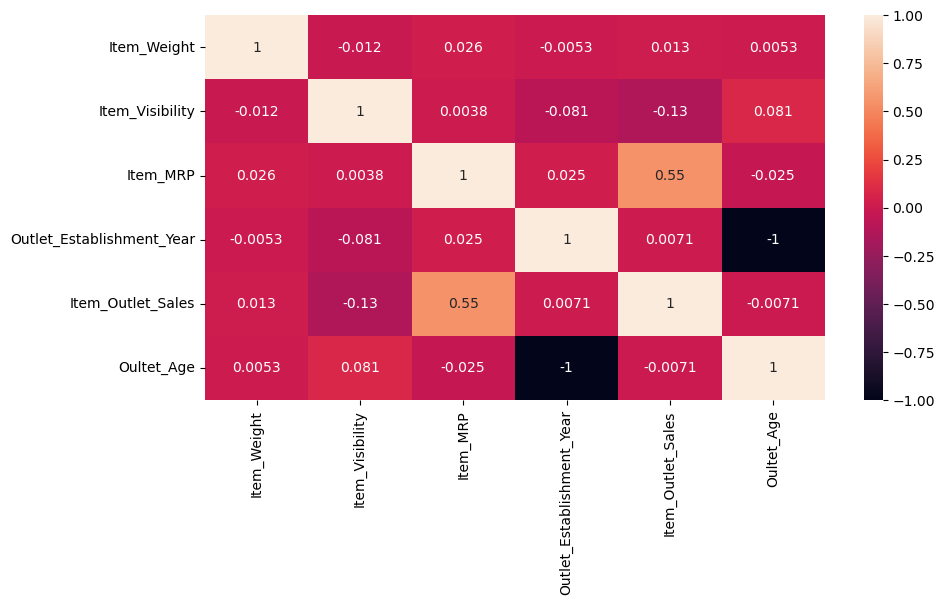

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

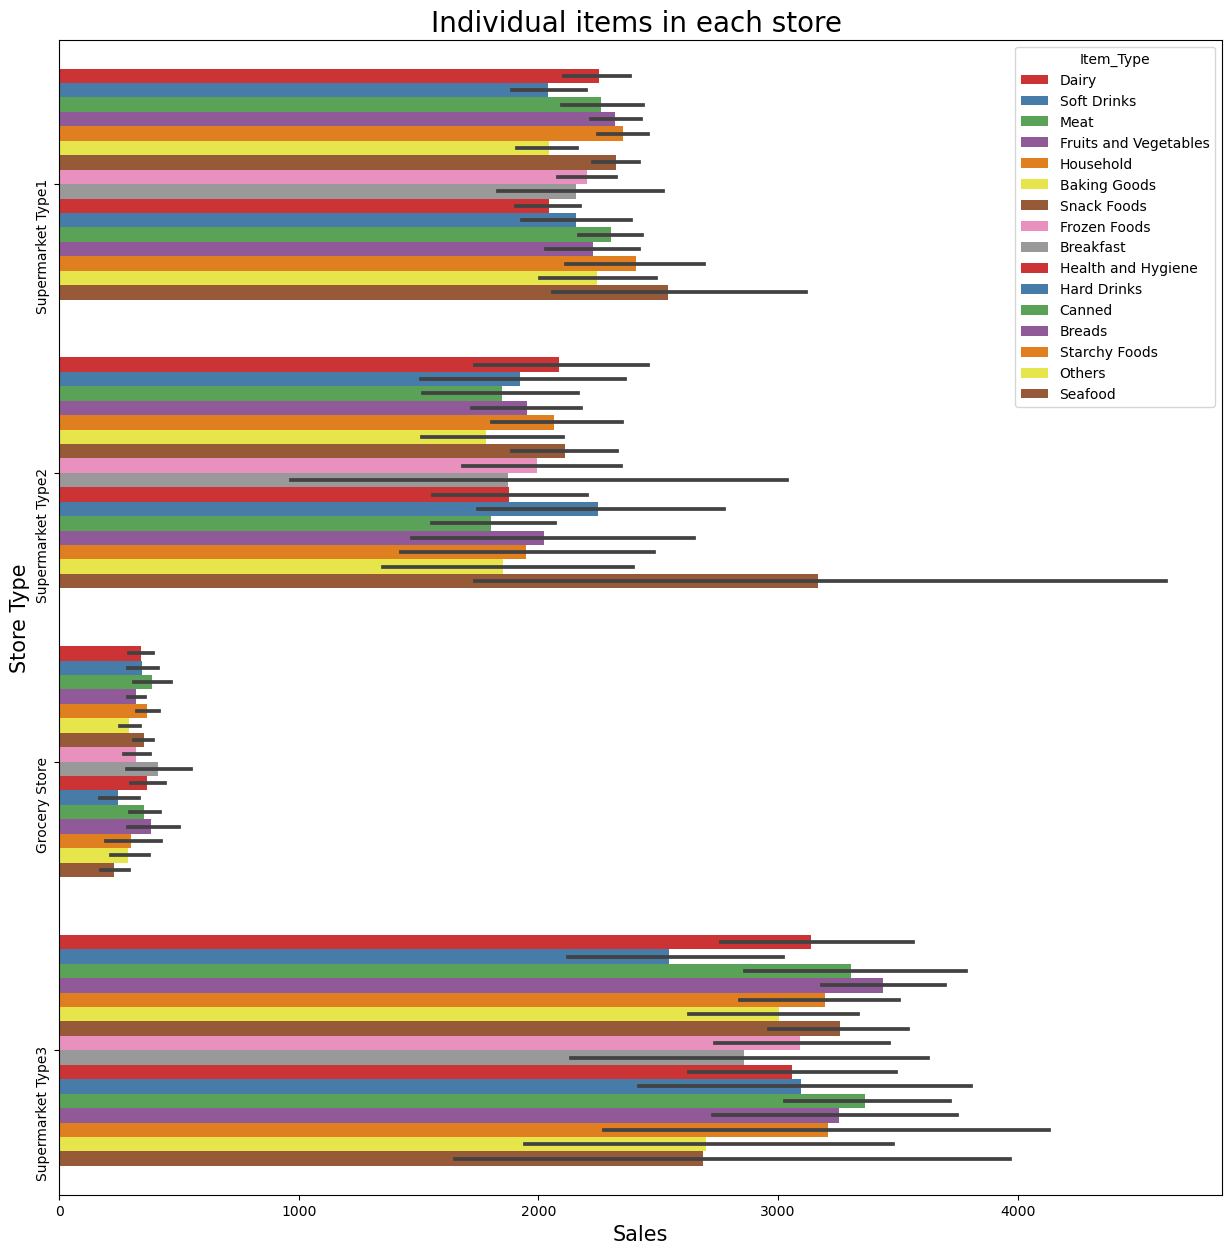

In [47]:
plt.figure(figsize=(15,15))
sns.barplot(data=data,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.show()

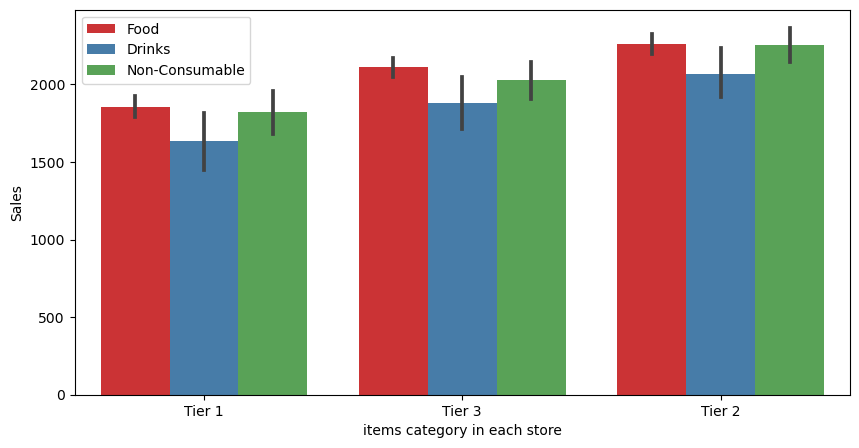

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type_Combined',palette='Set1')
plt.xlabel('items category in each store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.legend()
plt.show()

In [49]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
Item_Type_Combined           0
Oultet_Age                   0
dtype: int64

In [50]:
!pip install dtale

Defaulting to user installation because normal site-packages is not writeable


In [51]:
import dtale

In [52]:
dtale.show(data)

In [53]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=le.fit_transform(data['Outlet_Type'])

In [54]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,df_train,Food,14
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,df_train,Drinks,4
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,df_train,Food,14
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,df_train,Food,15
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,df_train,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,0,2,1,2778.3834,df_train,Food,26
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,1,549.2850,df_train,Food,11
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,2,1,1,1193.1136,df_train,Non-Consumable,9
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,2,1845.5976,df_train,Food,4


In [55]:
#OneHot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
# Columns for applying One-Hot encoding
cols = ['Item_Type_Combined']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(data[cols])).astype('int64')

# get feature columns
data_oh.columns = OH_encoder.get_feature_names_out(cols)
# # # One-hot encoding removed index; put it back
data_oh.index = data.index

# # # Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
data_fe = pd.concat([data, data_oh], axis=1)
data_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,df_train,Food,14,0,1,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,df_train,Drinks,4,1,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,df_train,Food,14,0,1,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,df_train,Food,15,0,1,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,df_train,Non-Consumable,26,0,0,1


In [56]:
data_fe.shape

(8337, 18)

In [57]:
# Drop irrlevent Columns
data_fe = data_fe.drop(['Item_Identifier','Item_Type_Combined', 'Outlet_Identifier','Oultet_Age',
                     'Item_Fat_Content','Item_Visibility', 'Item_Type','Item_Type_Combined',
                     'Outlet_Establishment_Year','Item_Type','source'], axis=1)
data_fe.head()

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,249.8092,1,0,1,3735.1380,0,1,0
1,5.92,48.2692,1,2,2,443.4228,1,0,0
2,17.50,141.6180,1,0,1,2097.2700,0,1,0
3,19.20,182.0950,1,2,0,732.3800,0,1,0
4,8.93,53.8614,0,2,1,994.7052,0,0,1


In [58]:
X=data_fe.drop('Item_Outlet_Sales',axis=1)
y=data_fe['Item_Outlet_Sales']

In [59]:
#Splitting Data into Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
X_train.head()

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
2146,10.195000,113.9860,1,2,2,1,0,0
8204,7.235000,197.5452,1,2,0,0,1,0
1065,16.750000,35.7532,1,2,0,0,0,1
4946,8.930000,152.3340,2,1,1,1,0,0
1350,12.792854,123.4730,2,0,0,0,0,1


In [61]:
X_test.head()

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
3241,12.15,187.5872,2,1,1,0,1,0
438,20.70,213.4876,1,0,1,0,1,0
7267,15.25,215.1192,1,1,1,0,1,0
722,20.00,127.3678,2,0,1,0,1,0
1230,20.60,76.3696,1,1,1,0,0,1


In [62]:
y_train.head()

2146     452.7440
8204     195.7452
1065     143.8128
4946    2143.8760
1350     369.5190
Name: Item_Outlet_Sales, dtype: float64

In [63]:
y_train.head()

2146     452.7440
8204     195.7452
1065     143.8128
4946    2143.8760
1350     369.5190
Name: Item_Outlet_Sales, dtype: float64

# Modeling

In [64]:
#Linear Regression
from sklearn.linear_model import LinearRegression
#metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
lr = LinearRegression()

In [65]:
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(X_test)

In [67]:
# Score Metrics for Regression:
lr_mae = mae(y_test, y_pred)
lr_mse = mse(y_test, y_pred)
lr_r2 = r2(y_test, y_pred)
print(f" Mean Absolute Error: {lr_mae}")
print(f" Squared Mean Squared Error: {np.sqrt(lr_mse)}")
print(f" R^2 Score: {lr_r2}")

 Mean Absolute Error: 807.3982127440225
 Squared Mean Squared Error: 1040.1757554660833
 R^2 Score: 0.48123545452086747


In [68]:
#Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)

In [69]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [70]:
y_pred = ridge.predict(X_test)

In [71]:
lr_mae = mae(y_test, y_pred)
lr_mse = mse(y_test, y_pred)
lr_r2 = r2(y_test, y_pred)
print(f" Mean Absolute Error: {lr_mae}")
print(f" Squared Mean Squared Error: {np.sqrt(lr_mse)}")
print(f" R^2 Score: {lr_r2}")

 Mean Absolute Error: 807.3964047735114
 Squared Mean Squared Error: 1040.17452161016
 R^2 Score: 0.4812366852365889


In [72]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5)

In [73]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [74]:
y_pred = rf.predict(X_test)

In [75]:
lr_mae = mae(y_test, y_pred)
lr_mse = mse(y_test, y_pred)
lr_r2 = r2(y_test, y_pred)
print(f" Mean Absolute Error: {lr_mae}")
print(f" Squared Mean Squared Error: {np.sqrt(lr_mse)}")
print(f" R^2 Score: {lr_r2}")

 Mean Absolute Error: 691.4646131917532
 Squared Mean Squared Error: 939.300885046979
 R^2 Score: 0.5769747448474974


In [76]:
#XGBoost
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5)

In [77]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [78]:
y_pred = xgb_model.predict(X_test)

In [79]:
lr_mae = mae(y_test, y_pred)
lr_mse = mse(y_test, y_pred)
lr_r2 = r2(y_test, y_pred)
print(f" Mean Absolute Error: {lr_mae}")
print(f" Squared Mean Squared Error: {np.sqrt(lr_mse)}")
print(f" R^2 Score: {lr_r2}")

 Mean Absolute Error: 731.9515691252966
 Squared Mean Squared Error: 1013.6482535418261
 R^2 Score: 0.5073580553473704


# Summary

In this data science project, we used sales data from BigMart to build a predictive model for the sales of each product at a particular store. We followed a structured approach that included the following steps:

Hypothesis Generation: We generated hypotheses about the factors that could affect sales.

Loading Packages and Data: We loaded the required packages and the sales data.

Data Structure and Content: We explored the data structure and content, and identified missing values.

Exploratory Data Analysis: We performed univariate and bivariate analysis to gain insights into the data.

Missing Value Treatment: We imputed missing values using mean or mode.

Feature Engineering: We Deleted the features based on our hypotheses to improve model performance.Deleting columns involves removing features that are not useful or redundant.

Encoding Categorical Variables: We encoded categorical variables using label encoding and OneHot encoding.

Preprocessing Data: We handled missing values and removed outliers.

Modeling: We built and evaluated different machine learning models, including linear regression, regularized linear regression(Ridge), random forest, and XGBoost.

Overall,The higher R2 score and a lower MSE indicate better model performance. we found that the Random Forest model performed the best with a r2_score(coefficient of determination) of 58% ,mae(Mean Average Error) of 691.3 and mse(Squared Mean Squared Error) of 938.9 on the test set. This model can be used by BigMart to understand the properties of products and stores that play a key role in increasing sales, and make data-driven decisions to improve sales.

# END